In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
df = pd.read_csv("house_price.csv")

In [5]:
print(df.columns)

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


In [7]:
# Q2: Outlier Detection and Removal

# 1. Mean and Standard Deviation Method
mean = df["price_per_sqft"].mean()
std_dev = df["price_per_sqft"].std()
lower_limit = mean - 3 * std_dev
upper_limit = mean + 3 * std_dev
df_std = df[(df["price_per_sqft"] >= lower_limit) & (df["price_per_sqft"] <= upper_limit)]

In [9]:
# 2. Percentile Method (1st and 99th percentile)
lower_percentile = np.percentile(df["price_per_sqft"], 1)
upper_percentile = np.percentile(df["price_per_sqft"], 99)
df_percentile = df[(df["price_per_sqft"] >= lower_percentile) & (df["price_per_sqft"] <= upper_percentile)]

In [11]:
# 3. IQR Method
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1
lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR
df_iqr = df[(df["price_per_sqft"] >= lower_iqr) & (df["price_per_sqft"] <= upper_iqr)]

In [13]:
# 4. Z-Score Method
z_scores = np.abs(stats.zscore(df["price_per_sqft"]))
df_zscore = df[z_scores < 3]

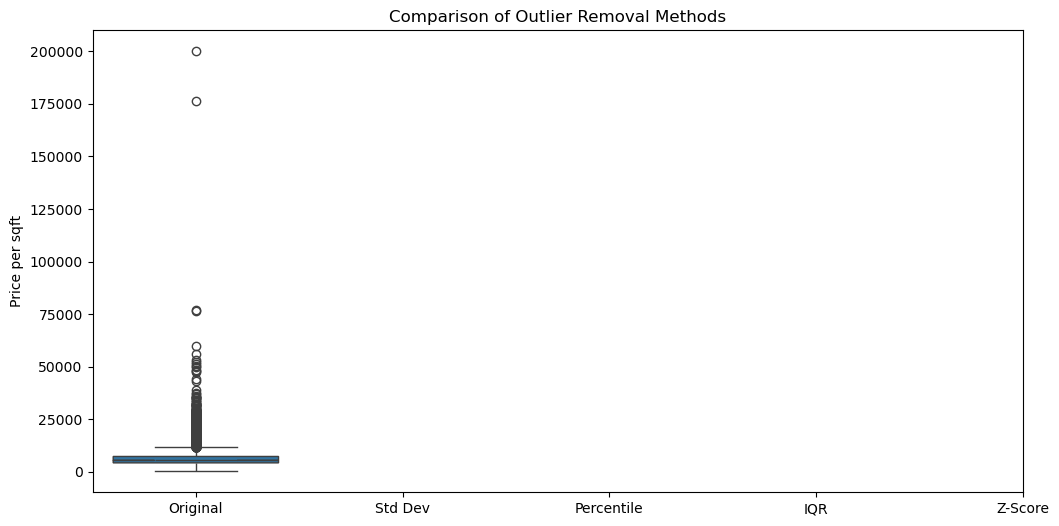

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df["price_per_sqft"], df_std["price_per_sqft"], df_percentile["price_per_sqft"], df_iqr["price_per_sqft"], df_zscore["price_per_sqft"]], notch=True)
plt.xticks([0, 1, 2, 3, 4], ["Original", "Std Dev", "Percentile", "IQR", "Z-Score"])
plt.title("Comparison of Outlier Removal Methods")
plt.ylabel("Price per sqft")
plt.show()

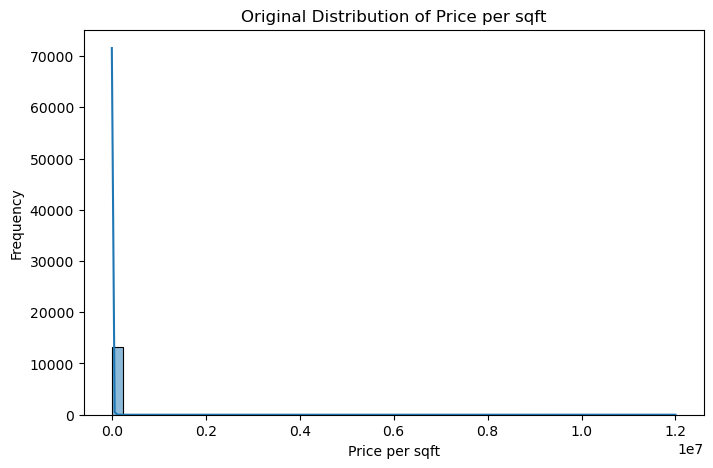

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft"], bins=50, kde=True)
plt.title("Original Distribution of Price per sqft")
plt.xlabel("Price per sqft")
plt.ylabel("Frequency")
plt.show()

In [19]:
print("Skewness before transformation:", df["price_per_sqft"].skew())
print("Kurtosis before transformation:", df["price_per_sqft"].kurt())

Skewness before transformation: 108.28105529705168
Kurtosis before transformation: 12095.21502832288


In [23]:
df["price_per_sqft_log"] = np.log1p(df["price_per_sqft"])

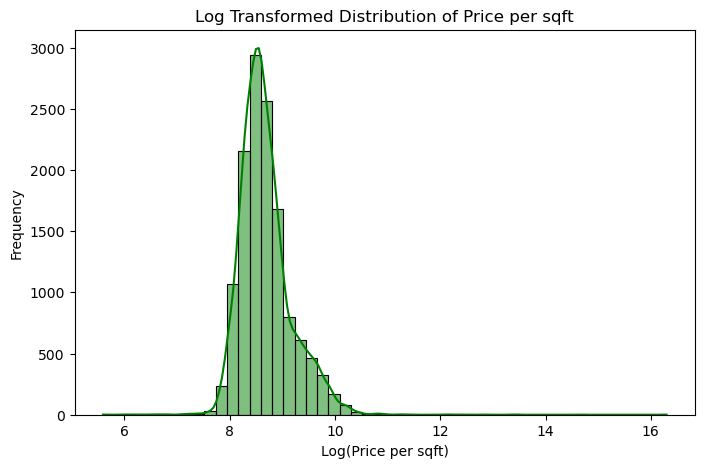

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft_log"], bins=50, kde=True, color="green")
plt.title("Log Transformed Distribution of Price per sqft")
plt.xlabel("Log(Price per sqft)")
plt.ylabel("Frequency")
plt.show()

In [27]:
print("Skewness after transformation:", df["price_per_sqft_log"].skew())
print("Kurtosis after transformation:", df["price_per_sqft_log"].kurt())

Skewness after transformation: 1.4004850530059296
Kurtosis after transformation: 9.206942162860814


In [31]:
print(df.dtypes)

location               object
size                   object
total_sqft            float64
bath                  float64
price                 float64
bhk                     int64
price_per_sqft          int64
price_per_sqft_log    float64
dtype: object


In [35]:
df["price_per_sqft"] = pd.to_numeric(df["price_per_sqft"], errors="coerce")

In [37]:
df = df.dropna(subset=["price_per_sqft"])

In [43]:
print(df["price_per_sqft"].dtype)

int64


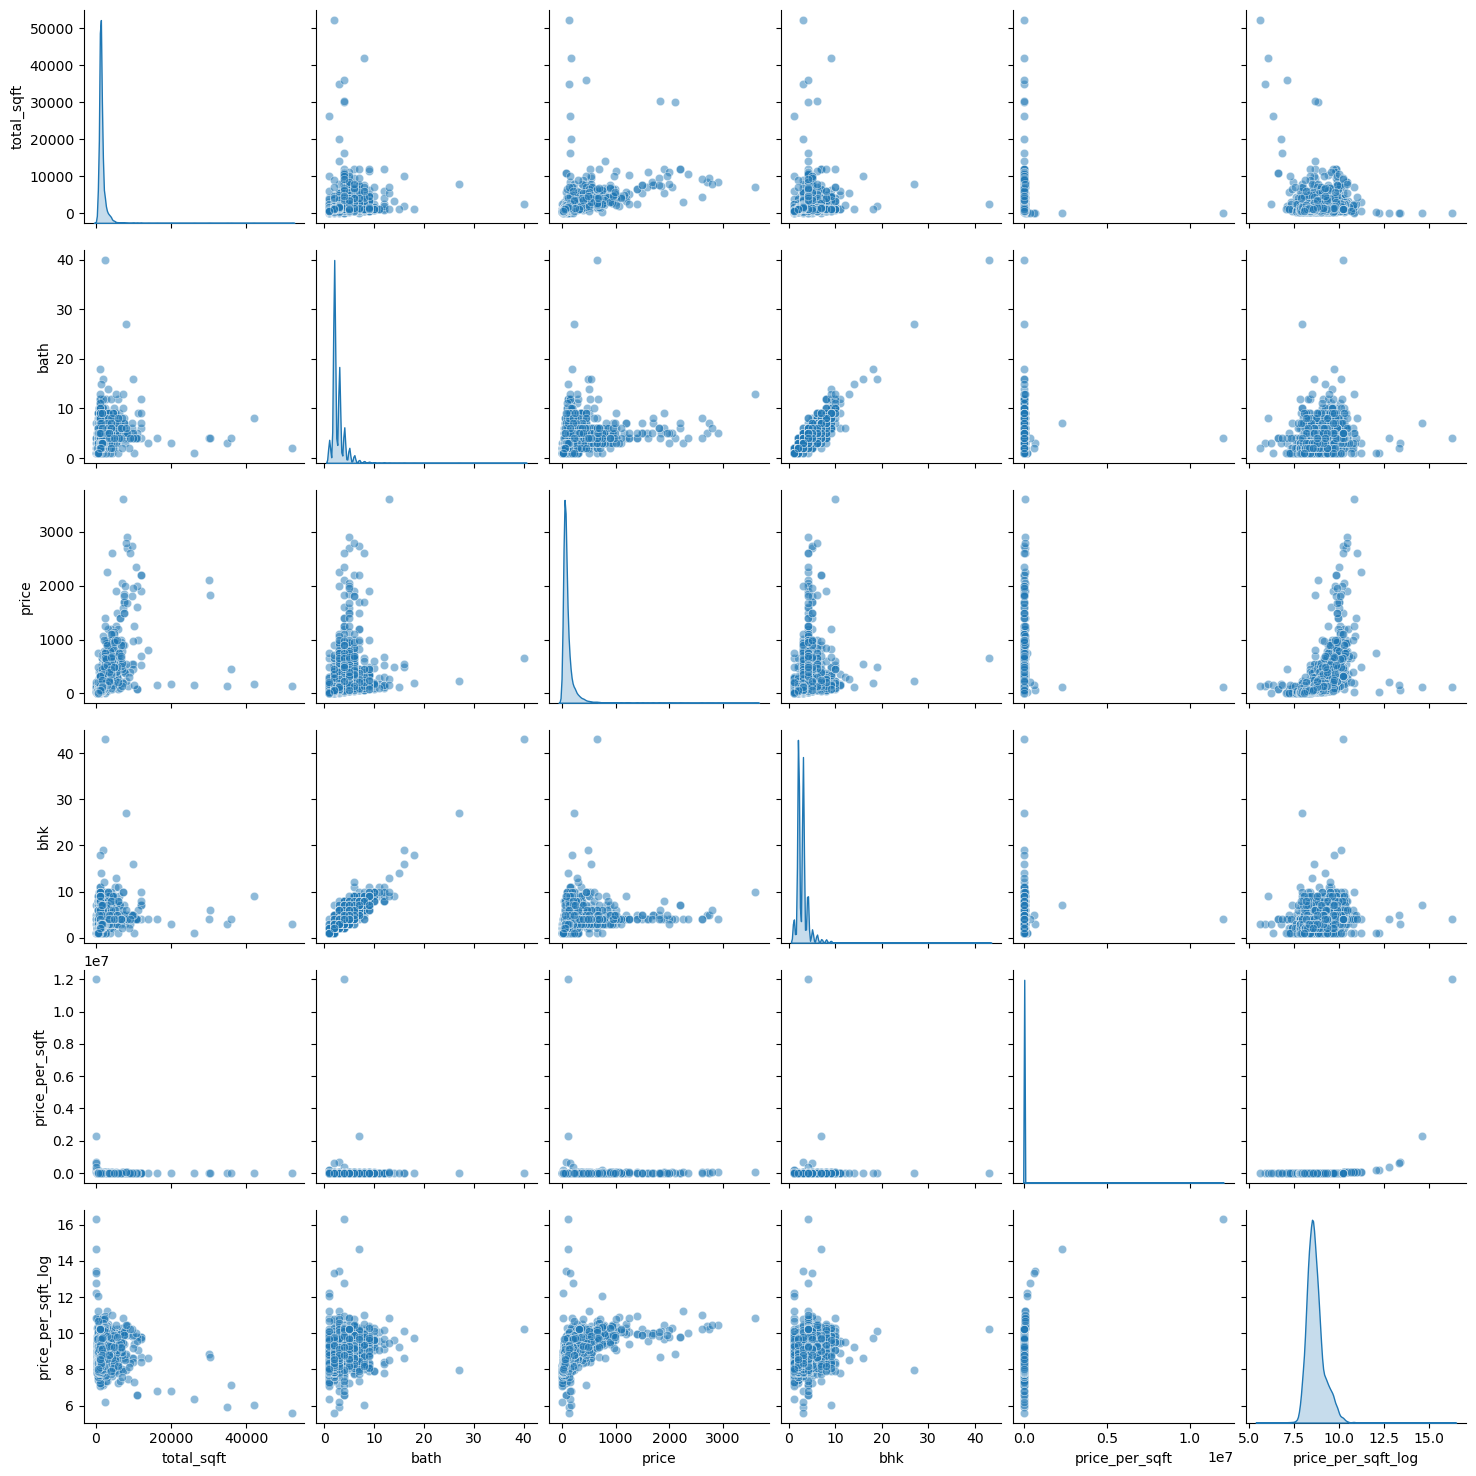

In [46]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.show()